In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
from IPython.display import clear_output

# set plt font size
plt.rcParams.update({'font.size': 16})

In [22]:
# res = "128_32_96"
res = "64_16_48"
uflux = "2"

os.chdir("/Users/georg/Studium/Master/Thesis/env/microhh/cases/jaenschwalde/snaps_{}_uflux{}".format(res, uflux))

In [23]:
ds_co2_path = nc.Dataset("nc_files/co2_path.xy.nc")
ds_co2 = nc.Dataset("nc_files/co2.xy.nc")
ds_u = nc.Dataset("nc_files/u.xy.nc")
ds_v = nc.Dataset("nc_files/v.xy.nc")
ds_w = nc.Dataset("nc_files/w.xy.nc")

In [24]:
co2_path = np.array(ds_co2_path.variables["co2_path"][:])
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

In [25]:
# save co2_path, co2, u, v, w
np.save("npy_files/co2_path.npy", co2_path)
np.save("npy_files/co2_xy.npy", co2)
np.save("npy_files/u_xy.npy", u)
np.save("npy_files/v_xy.npy", v)
np.save("npy_files/w_xy.npy", w)

In [26]:
co2_min, co2_max = np.min(co2_path), np.max(co2_path)
u_min, u_max = np.min(u), np.max(u)
u_range = u_max - u_min
u_min, u_max = u_min + 0.1 * u_range, u_max - 0.1 * u_range
w_min, w_max = np.min(w), np.max(w)
w_range = w_max - w_min
w_min, w_max = w_min + 0.1 * w_range, w_max - 0.1 * w_range

In [27]:
for i in range(len(co2_path)):
    print(f"\rFrame {i+1:3d}/{len(co2_path):3d}", end="")
    plt.figure(figsize=(15, 12))
    plt.suptitle(f"Simulation with uflux={uflux} m/s\nt={i*300} s")
    plt.subplot(3, 1, 1)
    plt.imshow(co2_path[i], vmin=0, vmax=co2_max*0.8, extent=[0, 12.8, 0, 3.2])
    plt.title("CO2 (integrated)")
    plt.xlabel("x [km]")
    plt.ylabel("y [km]")
    plt.colorbar(shrink=0.7)
    plt.subplot(3, 1, 2)
    plt.imshow(u[i, 2], vmin=u_min, vmax=u_max, extent=[0, 12.8, 0, 3.2])
    plt.title("u (at z=365m, in m/s)")
    plt.xlabel("x [km]")
    plt.ylabel("y [km]")
    plt.colorbar(shrink=0.7)
    plt.subplot(3, 1, 3)
    plt.imshow(w[i, 0], vmin=w_min, vmax=w_max, extent=[0, 12.8, 0, 3.2])
    plt.title("w (at z=365m, in m/s)")
    plt.xlabel("x [km]")
    plt.ylabel("y [km]")
    plt.colorbar(shrink=0.7)
    plt.tight_layout()
    plt.savefig(f"../frames/xy_{i:04d}.png")
    plt.close()
    # plt.pause(0.01)
    # clear_output(wait=True)
print()

Frame 261/289

In [9]:
# make video with all frames using ffmpeg with 10 fps
!ffmpeg -y -r 7 -i ../frames/xy_%04d.png -c:v libx264 -vf fps=30 -pix_fmt yuv420p ../xy_{res}_uflux{uflux}.mp4
!ffmpeg -y -r 3 -i ../frames/xy_%04d.png -c:v libx264 -vf fps=30 -pix_fmt yuv420p ../xy_{res}_uflux{uflux}_slow.mp4

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

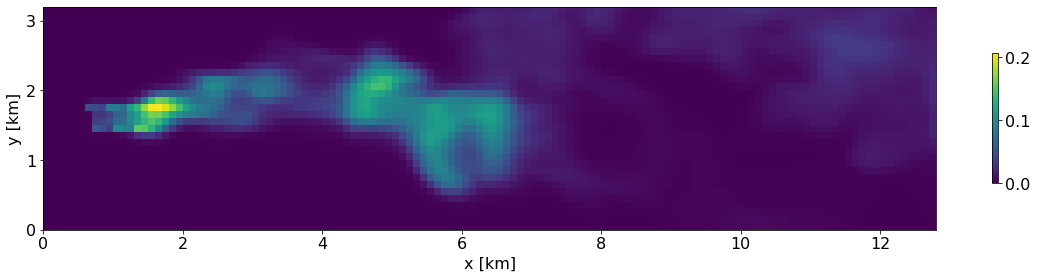

In [10]:
plt.figure(figsize=(20, 12))
plt.imshow(co2_path[200], extent=[0, 12.8, 0, 3.2])
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.colorbar(shrink=0.2)
plt.show()

In [11]:
u_mean = np.mean(u[100:], axis=0)
v_mean = np.mean(v[100:], axis=0)
w_mean = np.mean(w[100:], axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(2, 3))

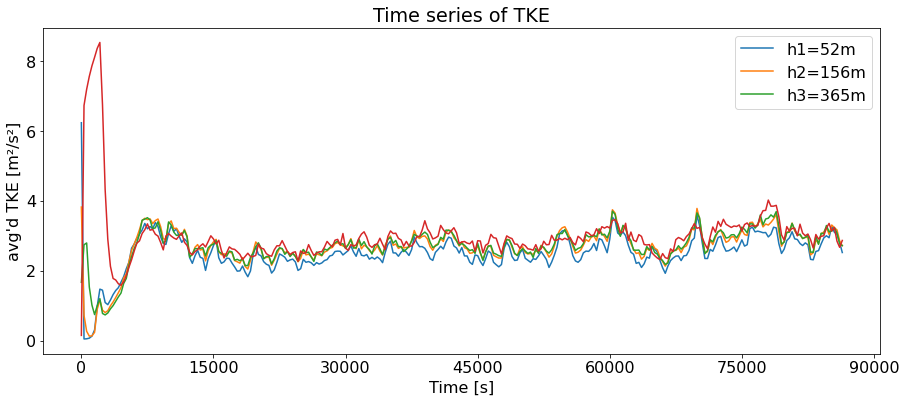

In [12]:
plt.figure(figsize=(15, 6))
plt.title("Time series of TKE")
plt.plot(tke_time_series)
plt.xlabel("Time [s]")
plt.xticks(np.arange(0, 340, 50), np.arange(0, 340*300, 50*300))
plt.ylabel("avg'd TKE [m²/s²]")
plt.legend(["h1=52m", "h2=156m", "h3=365m"])
plt.savefig(f"../tke_{res}_uflux{uflux}.png")

In [13]:
np.mean(tke_time_series[-100:], axis=0)

array([2.72745669, 2.94733967, 2.97552476, 3.09129681])

In [14]:
ds_co2 = nc.Dataset("nc_files/co2.xz.nc")
ds_u = nc.Dataset("nc_files/u.xz.nc")
ds_v = nc.Dataset("nc_files/v.xz.nc")
ds_w = nc.Dataset("nc_files/w.xz.nc")

In [15]:
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

In [16]:
# save co2, u, v, w
np.save("npy_files/co2_xz.npy", co2)
np.save("npy_files/u_xz.npy", u)
np.save("npy_files/v_xz.npy", v)
np.save("npy_files/w_xz.npy", w)

In [17]:
co2_min, co2_max = np.min(co2), np.max(co2)
u_min, u_max = np.min(u), np.max(u)
u_range = u_max - u_min
u_min, u_max = u_min + 0.1*u_range, u_max - 0.1*u_range
w_min, w_max = np.min(w), np.max(w)
w_range = w_max - w_min
w_min, w_max = w_min + 0.1*w_range, w_max - 0.1*w_range

for i in range(len(co2)):
    print(f"\rFrame {i+1:3d}/{len(co2):3d}", end="")
    plt.figure(figsize=(10, 10))
    plt.suptitle(f"Simulation with uflux={uflux} m/s\nt={i*300} s")
    plt.subplot(3, 1, 1)
    plt.imshow(co2[i, :, 0, :], origin="lower", vmin=0, vmax=co2_max*0.8, extent=[0, 12.8, 0, 5.0],
    aspect=0.75)
    plt.title("CO2 (at y=1.6km)")
    plt.xlabel("x [km]")
    plt.ylabel("z [km]")
    plt.colorbar(shrink=0.7)
    plt.subplot(3, 1, 2)
    plt.imshow(u[i, :, 0, :], origin="lower", vmin=u_min, vmax=u_max, extent=[0, 12.8, 0, 5.0],
    aspect=0.75)
    plt.title("u (at y=1.6km, in m/s)")
    plt.xlabel("x [km]")
    plt.ylabel("z [km]")
    plt.colorbar(shrink=0.7)
    plt.subplot(3, 1, 3)
    plt.imshow(w[i, :, 0, :], origin="lower", vmin=w_min, vmax=w_max, extent=[0, 12.8, 0, 5.0],
    aspect=0.75)
    plt.title("w (at y=1.6km, in m/s)")
    plt.xlabel("x [km]")
    plt.ylabel("z [km]")
    plt.colorbar(shrink=0.7)
    plt.tight_layout()
    plt.savefig(f"../frames/xz_{i:04d}.png")
    plt.close()
    # plt.pause(0.01)
    # clear_output(wait=True)
print()

Frame 289/289


In [18]:
# make video with all frames using ffmpeg with 10 fps
!ffmpeg -y -r 7 -i ../frames/xz_%04d.png -c:v libx264 -vf fps=30 -pix_fmt yuv420p ../xz_{res}_uflux{uflux}.mp4
!ffmpeg -y -r 3 -i ../frames/xz_%04d.png -c:v libx264 -vf fps=30 -pix_fmt yuv420p ../xz_{res}_uflux{uflux}_slow.mp4

ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 15.0.0 (clang-1500.1.0.2.5)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/6.1.1_4 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags='-Wl,-ld_classic' --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libharfbuzz --enable-libjxl --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopen

In [19]:
u_mean = np.mean(u[100:], axis=0)
v_mean = np.mean(v[100:], axis=0)
w_mean = np.mean(w[100:], axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(1, 3))

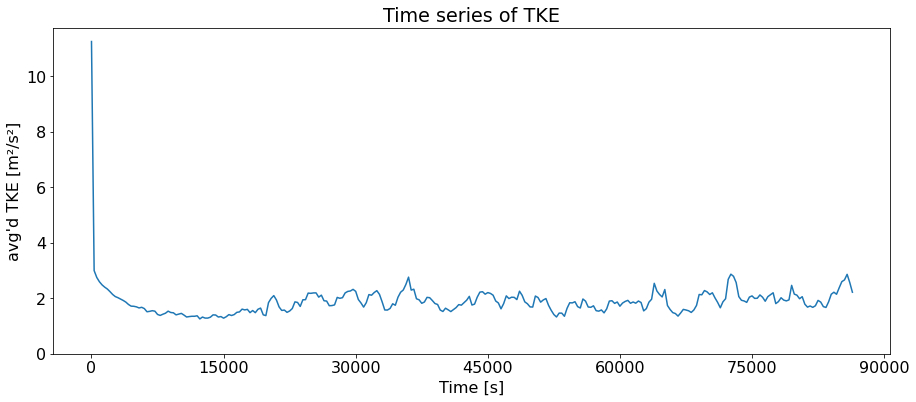

In [20]:
plt.figure(figsize=(15, 6))
plt.title("Time series of TKE")
plt.plot(tke_time_series)
plt.xlabel("Time [s]")
plt.xticks(np.arange(0, 340, 50), np.arange(0, 340*300, 50*300))
plt.ylabel("avg'd TKE [m²/s²]")
plt.ylim(bottom=0)
plt.savefig(f"../tke_{res}_uflux{uflux}_xz.png")

In [21]:
np.mean(tke_time_series[-100:], axis=0)

array([1.95693911])

# Sum of res

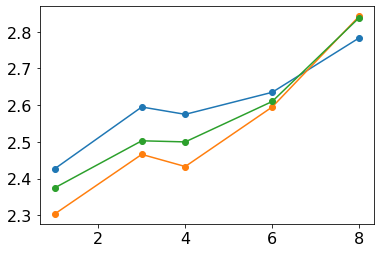

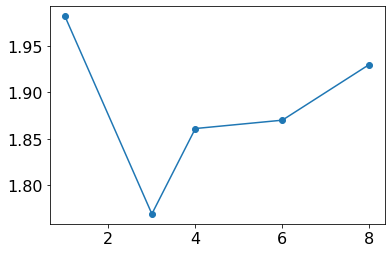

In [38]:
ufluxes = [4, 3, 1, 6, 8]

TKE_h1 = [2.575, 2.595, 2.427, 2.635, 2.783]
TKE_h2 = [2.433, 2.466, 2.304, 2.595, 2.842]
TKE_h3 = [2.500, 2.503, 2.375, 2.610, 2.838]
TKE_xy = [1.861, 1.769, 1.982, 1.870, 1.930]

# sort by ufluxes
TKE_h1 = [TKE_h1[i] for i in np.argsort(ufluxes)]
TKE_h2 = [TKE_h2[i] for i in np.argsort(ufluxes)]
TKE_h3 = [TKE_h3[i] for i in np.argsort(ufluxes)]
TKE_xy = [TKE_xy[i] for i in np.argsort(ufluxes)]
ufluxes = sorted(ufluxes)

plt.plot(ufluxes, TKE_h1, label="h1", marker="o")
plt.plot(ufluxes, TKE_h2, label="h2", marker="o")
plt.plot(ufluxes, TKE_h3, label="h3", marker="o")
plt.show()

plt.plot(ufluxes, TKE_xy, label="xy", marker="o")
plt.show()